In [1]:
from data_generation.gen_data import *
from model.utils import *

import seaborn as sns

# from alibi_detect.cd import LSDDDrift

In [2]:
# def add_drift(reference, drift_size: float, drift_ratio: float, drift_mode: str='fixed'):
#     """Artificially adds a shift to the data.
#     Args:
#     curr: initial data
#     drift_size: percents initial values would be increased by
#     drift_ratio: defines what percent of data would be drifted
#     drift_mode:
#         if drift_mode == 'fixed': 
#         # here we should use mean(reference), but in out experiment mean(reference) = mean(current) at this stage
#         all values moved by fixed delta = (alpha + mean(feature)) * drift_size
#         elif: 
#         drift_mode == 'relative': vlues moved by delta(value) = value * drift_size
#     Returns:
#     curr: drifted data
#     """
#     alpha = 0.001
#     i = int(np.round(len(reference) * drift_ratio))
#     change_sign = np.random.choice([1, 0, -1], p=[0.3, 0.5, 0.2])
#     # change_sign = 1
#     if drift_mode == 'fixed':
#         delta = int((alpha + np.mean(reference)) * drift_size)
#         reference[:i] = reference[:i] + change_sign*delta
#     else:
#         reference = reference.astype(float)
#         reference[:i] = reference[:i]*(1 + change_sign*drift_size)
#         reference = reference.astype(int)
#     reference[reference > 850] = 850
#     reference[reference < 300] = 300

#     return reference.tolist()

# def plot_drift(ref, drift_size: float, drift_ratio: float, drift_mode: str):
#     """For each feature from features plot initial distribution and distribution shifted by drift_size%
#     """
#     # assemble title
#     if drift_ratio == 1.:
#         s = 'all values '
#     else:
#         s = f'{int(drift_ratio * 100)}% segment ' 
#     title = s + f'moved by {int(drift_size * 100)}% ({drift_mode} drift)' 

#     # plot distributions
#     plt.figure(figsize=(10, 7))
#     curr = add_drift(ref, drift_size=drift_size, drift_ratio=drift_ratio, drift_mode=drift_mode)
#     df = pd.DataFrame(data=list(ref) + list(curr), columns=['values'])
#     df['group'] = ['reference']*len(ref) + ['current']*len(curr) 
#     sns.histplot(data=df, x="values", hue="group")
#     plt.suptitle(title, x=0.25, y=1, fontsize=20)

In [2]:
num_days = [30, 365]
num_samples = [100000]
dist = "logistic"
mode = "plain"
# value_range = [300, 850]
# mu_range = [600, 700]
# sigma_range = [100, ]

num_days_num_samples = [(num_day, num_sample) for num_day in num_days for num_sample in num_samples]
# data = generate_data(60, 100000, "logistic", mode=None)
for num_day, num_sample in tqdm(num_days_num_samples):
    # data = generate_data(num_day, num_sample, dist=dist, mode="historgram")
    data = generate_data(num_day, num_sample, dist=dist, mode=mode)
    with open(f"../data/train/{mode}/{dist}_{num_day}_days_{num_sample}_samples.npy", "wb") as f:
        np.save(f, data)

  0%|          | 0/2 [00:00<?, ?it/s]

Generating logistic distribution, 30 days, 100000 samples...


 50%|█████     | 1/2 [01:04<01:04, 64.55s/it]

Generating logistic distribution, 365 days, 100000 samples...


100%|██████████| 2/2 [09:40<00:00, 290.13s/it]


In [2]:
data_path = "../data/train/plain/logistic_30_days_100000_samples.npy"
data = np.load(data_path)
data.shape

(30, 100001)

In [2]:
num_day = 30
num_sample = 100000
dist = "logistic"
mode = "plain"

data = generate_data(num_day, num_sample, dist=dist, mode=mode)

Generating logistic distribution, 30 days, 100000 samples...


  3%|▎         | 1/29 [00:01<00:31,  1.11s/it]

Final: 0 [0.07785822522855608, 0.023781649337983036, 0.04875040209858239, 0.2196712120063875] 0.09251537216787725 [False, False, False, True]


  7%|▋         | 2/29 [00:01<00:21,  1.26it/s]

Final: 0 [0.006269214645081434, 0.00016793014960269216, 0.00032170261181551594, 0.015714563525030777] 0.0056183527328826045 [False, False, False, False]


 10%|█         | 3/29 [00:02<00:17,  1.50it/s]

Final: 1 [0.18136362236982256, 0.13100675766915593, 0.2682344837486398, 0.501899011228548] 0.27062596875404155 [True, True, True, True]


 14%|█▍        | 4/29 [00:02<00:16,  1.50it/s]

Final: 1 [0.1792035067771191, 0.12967729129439687, 0.26189675434583276, 0.4902121190556996] 0.2652474178682621 [True, True, True, True]


 17%|█▋        | 5/29 [00:05<00:31,  1.31s/it]

Final: 1 [0.10250766737893206, 0.04248153705657527, 0.0845190078603823, 0.25153876499960764] 0.12026174432387432 [True, False, False, True]


 21%|██        | 6/29 [00:07<00:34,  1.50s/it]

Final: 1 [0.1465287922251161, 0.0844675011215107, 0.1743962646582303, 0.42030645373331055] 0.2064247529345419 [True, False, True, True]


 24%|██▍       | 7/29 [00:07<00:27,  1.23s/it]

Final: 0 [0.004757194057771654, 9.081300887383395e-05, 0.00018105305253805318, 0.007893468675873013] 0.0032306321987641386 [False, False, False, False]


 28%|██▊       | 8/29 [00:08<00:22,  1.06s/it]

Final: 0 [0.04125545122775951, 0.00664774739072618, 0.013642563236320373, 0.10495370694040848] 0.041624867198803636 [False, False, False, True]


 31%|███       | 9/29 [00:10<00:27,  1.36s/it]

Final: 1 [0.16812305771364208, 0.11630933672369226, 0.22948859400364782, 0.45004003138762555] 0.24099025495715193 [True, True, True, True]


 34%|███▍      | 10/29 [00:11<00:20,  1.09s/it]

Final: 1 [0.14474156614259967, 0.08441003508021475, 0.16943581358261092, 0.3960034888714328] 0.19864772591921454 [True, False, True, True]


 38%|███▊      | 11/29 [00:11<00:16,  1.11it/s]

Final: 0 [0.061194554207046656, 0.014190468422621486, 0.030202856871603644, 0.14525053875786267] 0.06270960456478361 [False, False, False, True]


 41%|████▏     | 12/29 [00:12<00:13,  1.30it/s]

Final: 0 [0.023207812940077323, 0.002153338725289875, 0.004309992839928362, 0.058168029453901045] 0.02195979348979915 [False, False, False, False]


 45%|████▍     | 13/29 [00:12<00:10,  1.46it/s]

Final: 0 [0.060613448064189224, 0.013999121891010312, 0.029589517866032665, 0.14399567372706606] 0.062049440387074564 [False, False, False, True]


 48%|████▊     | 14/29 [00:13<00:09,  1.58it/s]

Final: 0 [0.0472896202269064, 0.008732872324684546, 0.017929137468500736, 0.11895376910624274] 0.048226349781583605 [False, False, False, True]


 52%|█████▏    | 15/29 [00:13<00:08,  1.69it/s]

Final: 0 [0.030040758865603426, 0.0035812526071493165, 0.007224769147855036, 0.08308319896696748] 0.030982494896893812 [False, False, False, False]


 55%|█████▌    | 16/29 [00:14<00:07,  1.75it/s]

Final: 0 [0.01608606438678941, 0.0010433914213467132, 0.002074106101816112, 0.027470789739646822] 0.011668587912399764 [False, False, False, False]


 59%|█████▊    | 17/29 [00:14<00:06,  1.81it/s]

Final: 0 [0.02665672462946394, 0.0028298455934780897, 0.005687969129394314, 0.07309279701883148] 0.027066834092791956 [False, False, False, False]


 62%|██████▏   | 18/29 [00:17<00:14,  1.35s/it]

Final: 1 [0.11327664644078901, 0.05295273309837401, 0.10352588716034865, 0.1937334645809112] 0.11587218282010572 [True, False, True, True]


 66%|██████▌   | 19/29 [00:18<00:11,  1.14s/it]

Final: 0 [0.035348495819697436, 0.004893167671664478, 0.010019025712051306, 0.0930886942865809] 0.03583734587249853 [False, False, False, False]


 69%|██████▉   | 20/29 [00:19<00:09,  1.00s/it]

Final: 0 [0.010548495473904214, 0.00044545447428167017, 0.0008938843770615335, 0.021089220948897886] 0.008244263818536327 [False, False, False, False]


 72%|███████▏  | 21/29 [00:19<00:06,  1.17it/s]

Final: 0 [0.07670889364258815, 0.02173987783059124, 0.0478647211649711, 0.16844846381001516] 0.0786904891120414 [False, False, False, True]


 76%|███████▌  | 22/29 [00:20<00:06,  1.12it/s]

Final: 1 [0.1608258442883916, 0.10801906770040946, 0.2101990883761564, 0.36377448290706443] 0.21070462081800545 [True, True, True, True]


 79%|███████▉  | 23/29 [00:23<00:08,  1.45s/it]

Final: 1 [0.10277292299828059, 0.04501763768351943, 0.08547212296637441, 0.25506623765551906] 0.12208223032592337 [True, False, False, True]


 83%|████████▎ | 24/29 [00:23<00:05,  1.19s/it]

Final: 0 [0.08411859279515274, 0.02543048876786721, 0.05848037303269871, 0.20594644780107446] 0.09349397559919828 [False, False, False, True]


 86%|████████▌ | 25/29 [00:25<00:05,  1.43s/it]

Final: 1 [0.1886113700811827, 0.14240930700449997, 0.2897990513220479, 0.4528310327211846] 0.2684126902822288 [True, True, True, True]


 90%|████████▉ | 26/29 [00:28<00:05,  1.72s/it]

Final: 1 [0.1390323724432134, 0.07865079266415187, 0.15642419908720429, 0.38516439818539727] 0.1898179405949917 [True, False, True, True]


 93%|█████████▎| 27/29 [00:32<00:04,  2.37s/it]

Final: 1 [0.1678665451091097, 0.11600162256737857, 0.22870221725281104, 0.43646374603824184] 0.2372585327418853 [True, True, True, True]


 97%|█████████▋| 28/29 [00:32<00:01,  1.83s/it]

Final: 0 [0.029401321808404768, 0.0034299178471347723, 0.0069198818996911386, 0.07791377714432957] 0.02941622467489006 [False, False, False, False]


100%|██████████| 29/29 [00:33<00:00,  1.15s/it]

Final: 0 [0.054187274950471695, 0.011117290157615369, 0.023696677835358736, 0.13631364160631312] 0.05632872113743973 [False, False, False, True]


In [5]:
X, y = data[:, :-1], data[1:, -1]
print(X.shape)
print(y.shape)

(30, 100000)
(29,)


In [6]:
index_0 = np.where(y == 0)[0]
index_0

array([ 0,  1,  6,  7, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 27, 28])

In [7]:
index_1 = np.where(y == 1)[0]
index_1

array([ 2,  3,  4,  5,  8,  9, 17, 21, 22, 24, 25, 26])

0 0
0.0 True
0.07785822522855608 False
0.023781649337983036 False
0.04875040209858239 False
0.2196712120063875 True 

1 0
0.005376912239005554 True
0.006269214645081434 False
0.00016793014960269216 False
0.00032170261181551594 False
0.015714563525030777 False 

2 0
0.24877891100282112 False
0.004757194057771654 False
9.081300887383395e-05 False
0.00018105305253805318 False
0.007893468675873013 False 

3 0
5.031209367192769e-105 True
0.04125545122775951 False
0.00664774739072618 False
0.013642563236320373 False
0.10495370694040848 True 

4 0
6.032535256624449e-175 True
0.061194554207046656 False
0.014190468422621486 False
0.030202856871603644 False
0.14525053875786267 True 

5 0
1.0743385104833485e-41 True
0.023207812940077323 False
0.002153338725289875 False
0.004309992839928362 False
0.058168029453901045 False 

6 0
1.3479398571697522e-183 True
0.060613448064189224 False
0.013999121891010312 False
0.029589517866032665 False
0.14399567372706606 True 

7 0
2.6085214601774966e-140 True
0

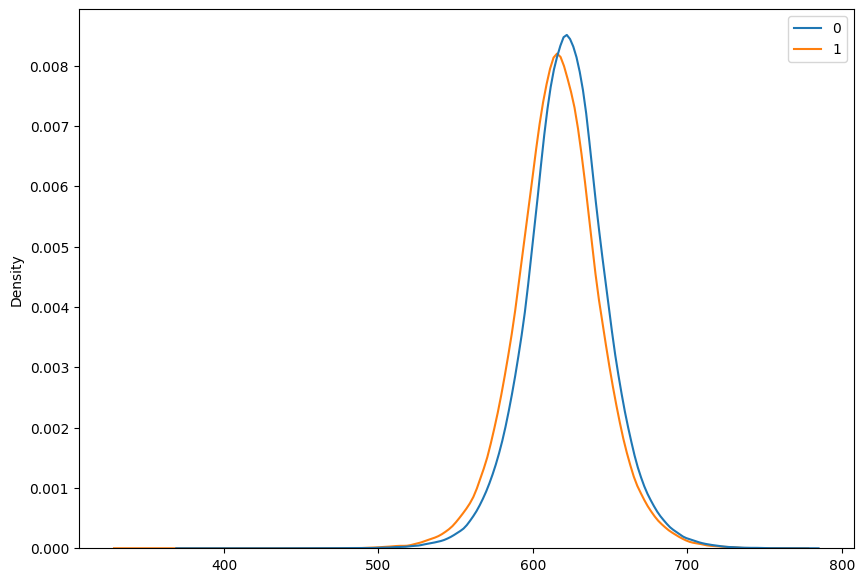

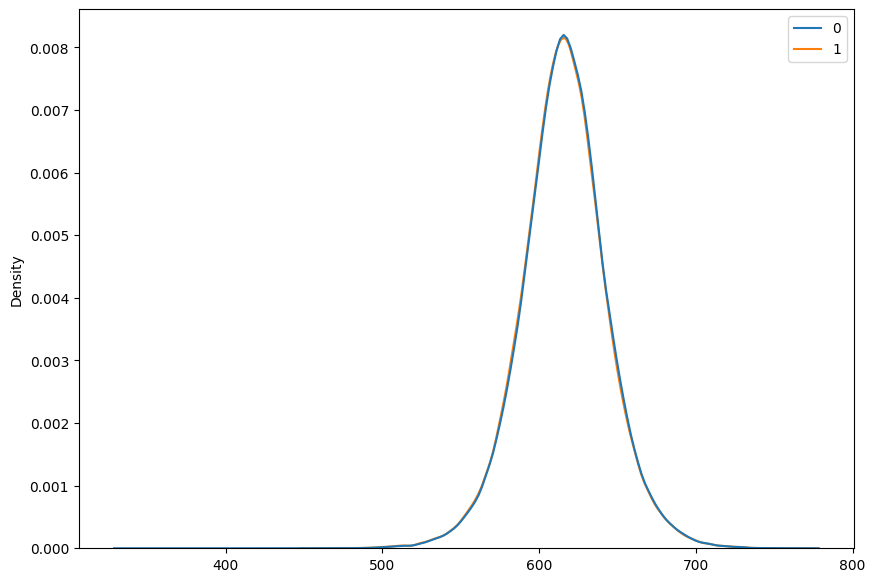

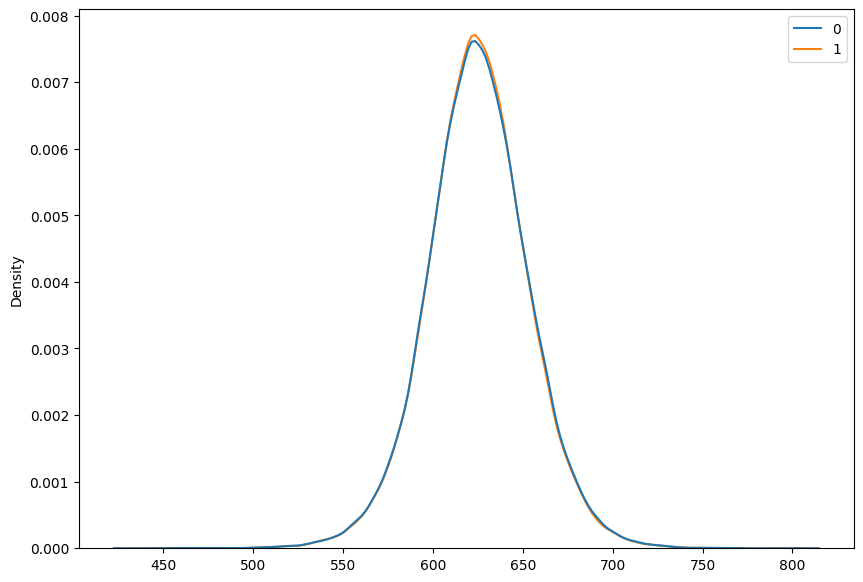

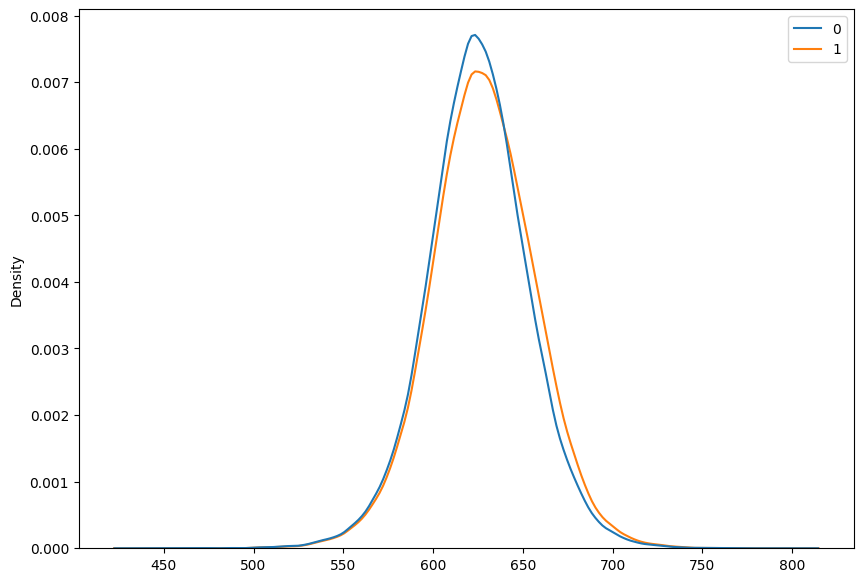

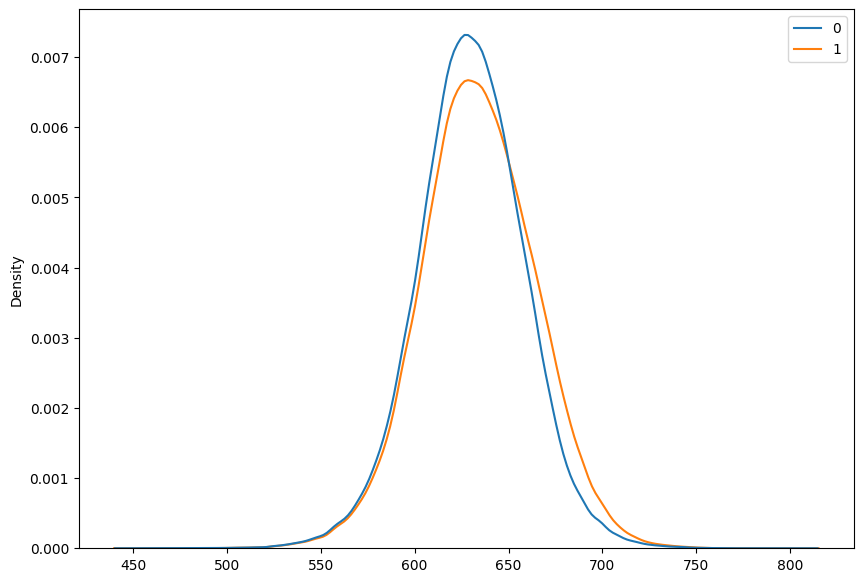

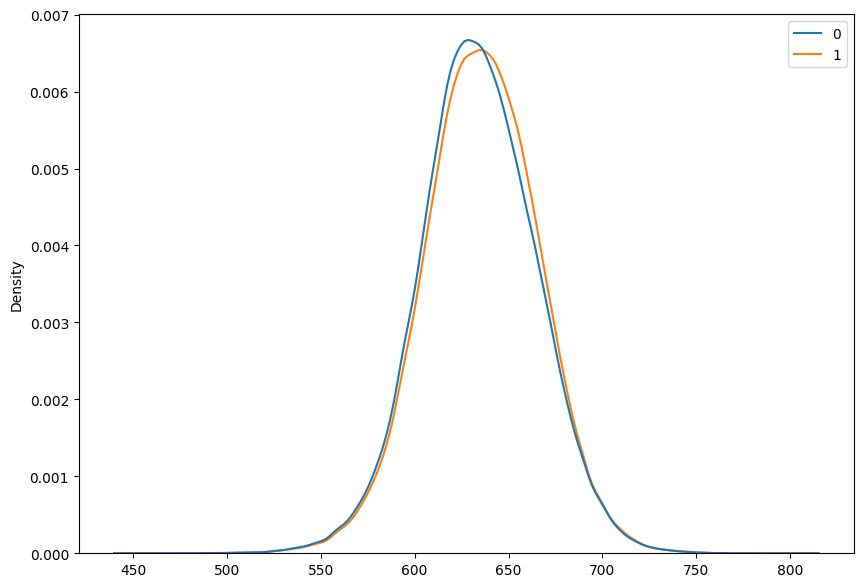

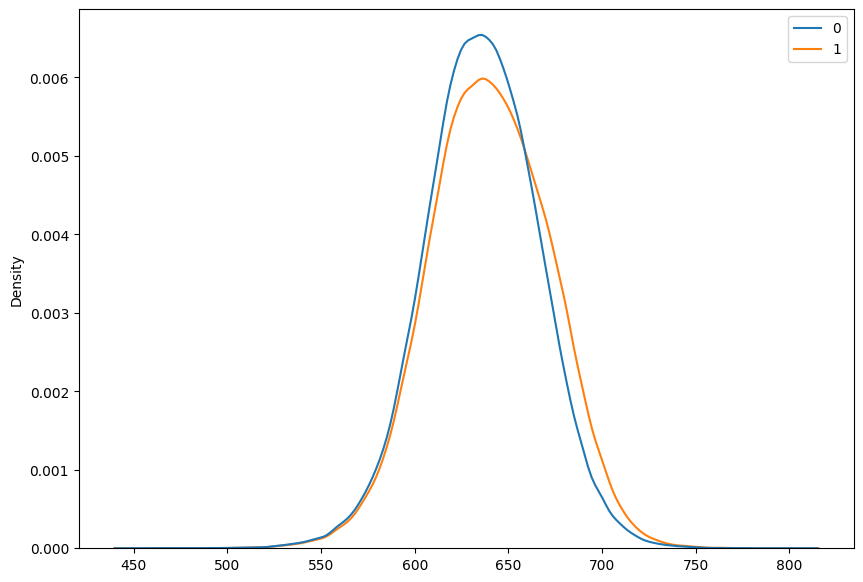

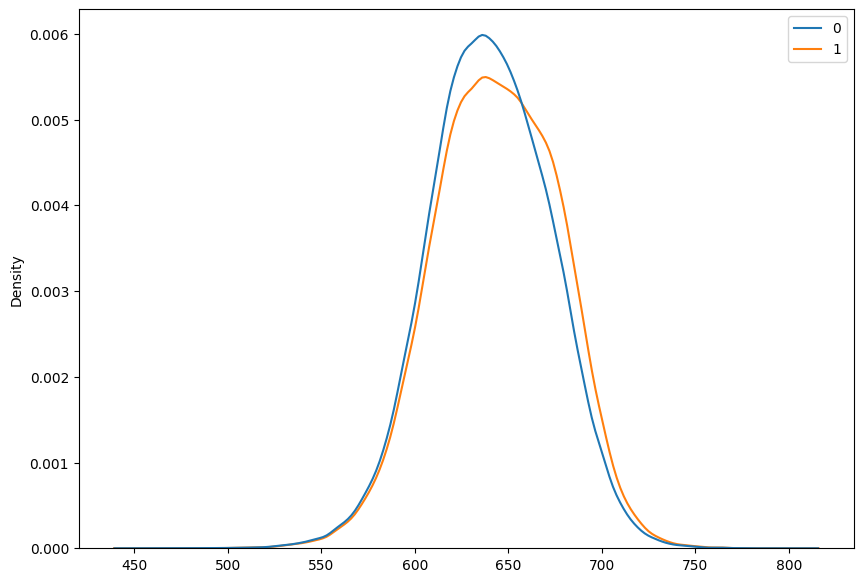

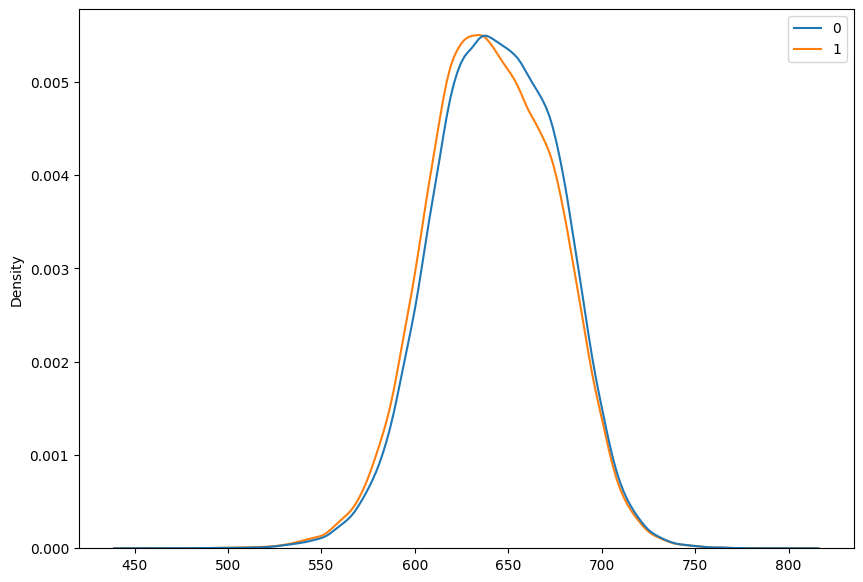

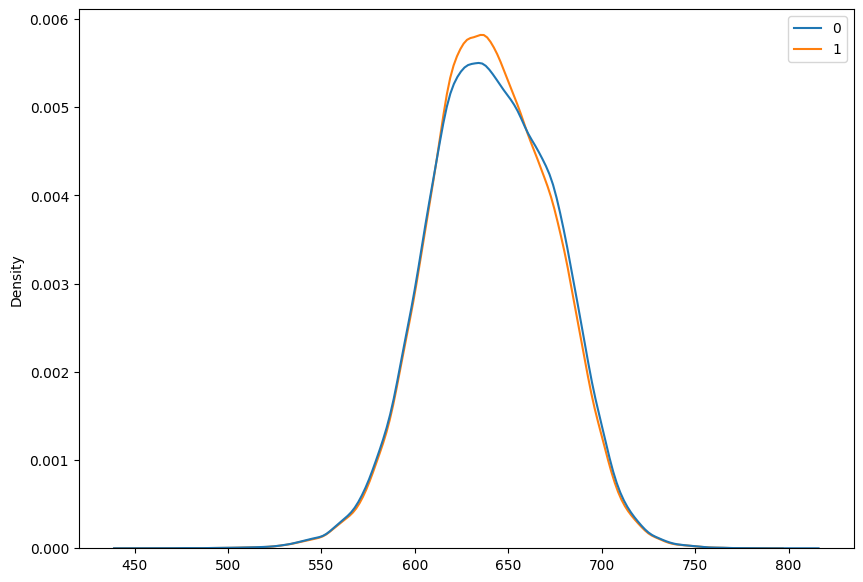

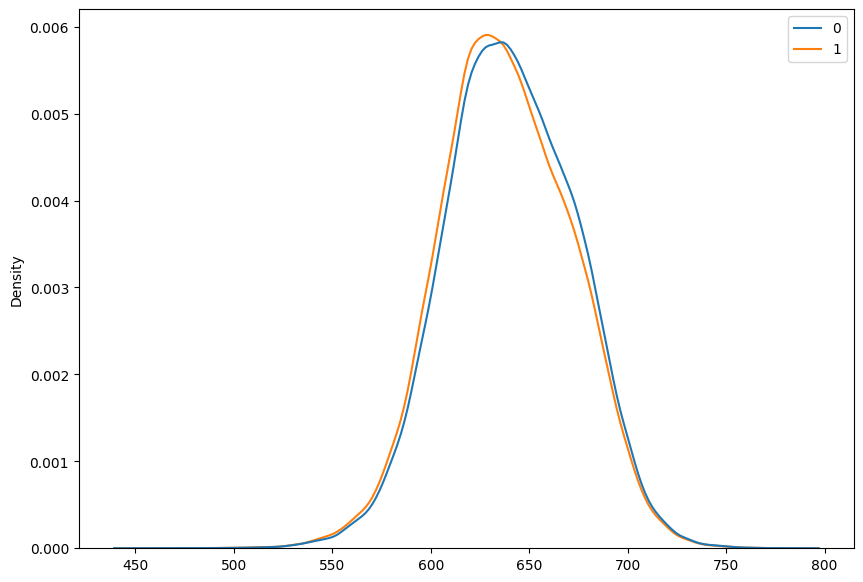

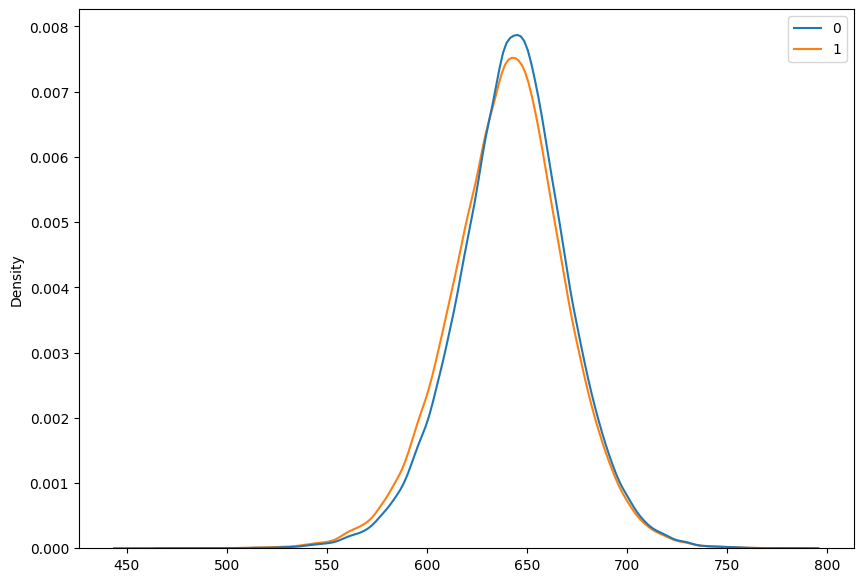

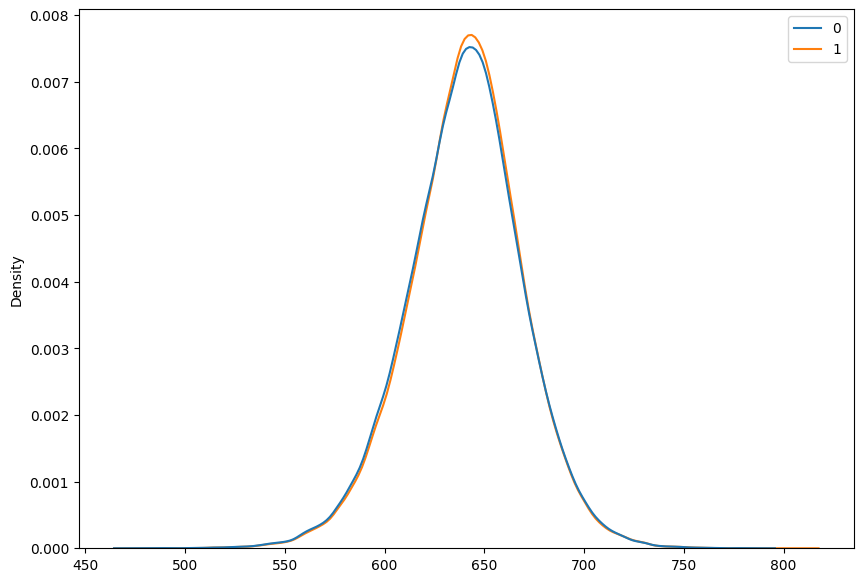

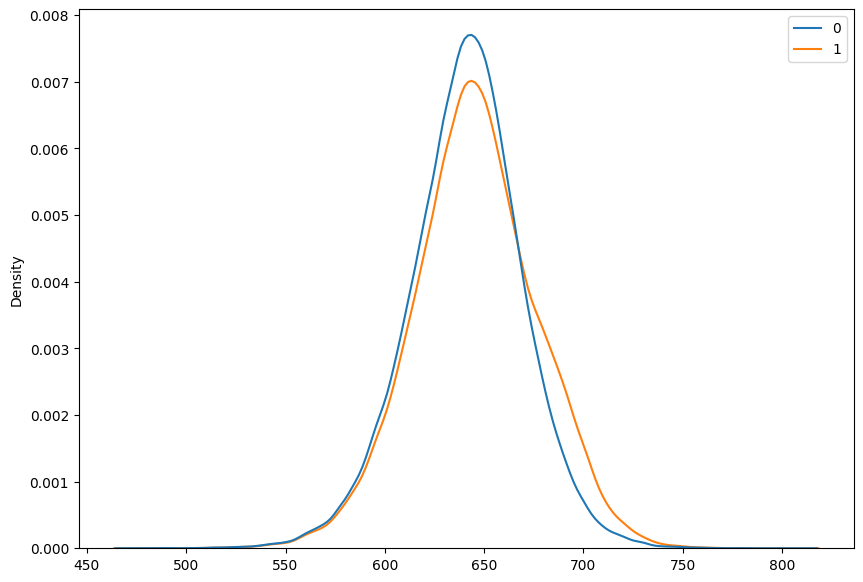

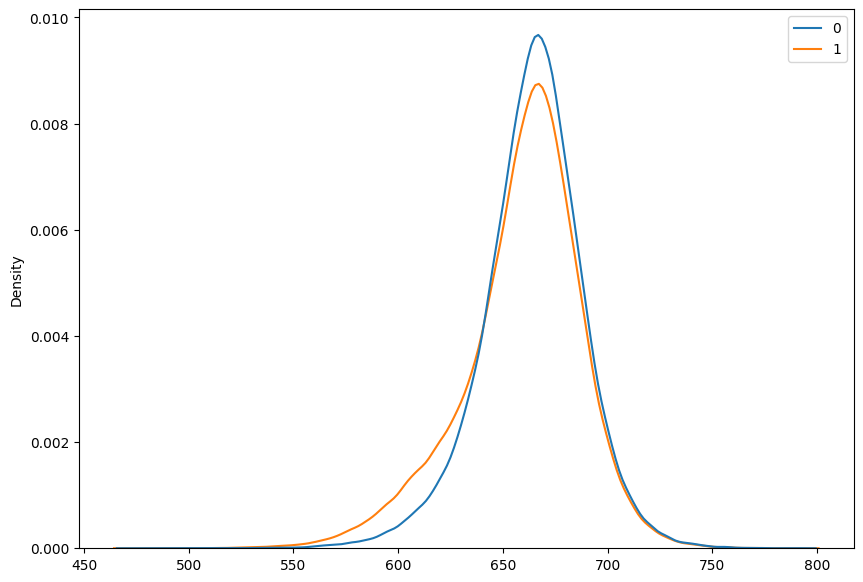

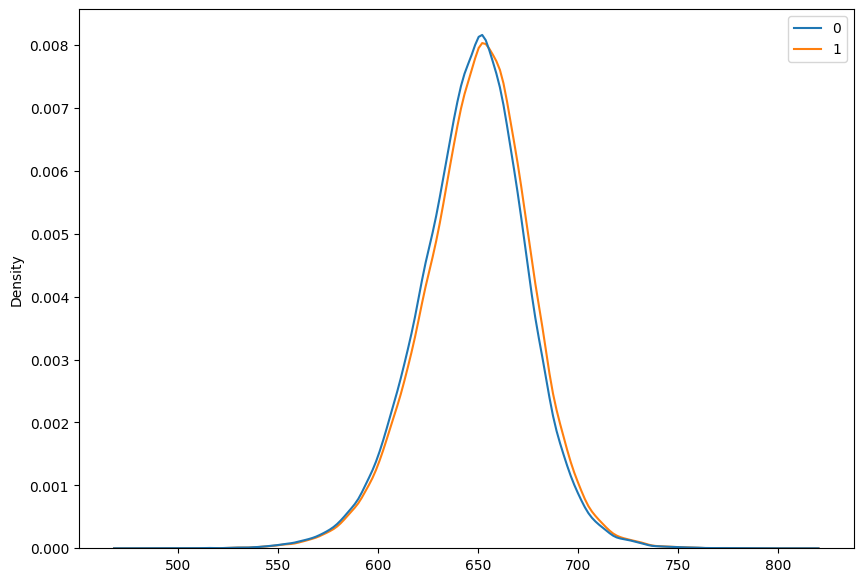

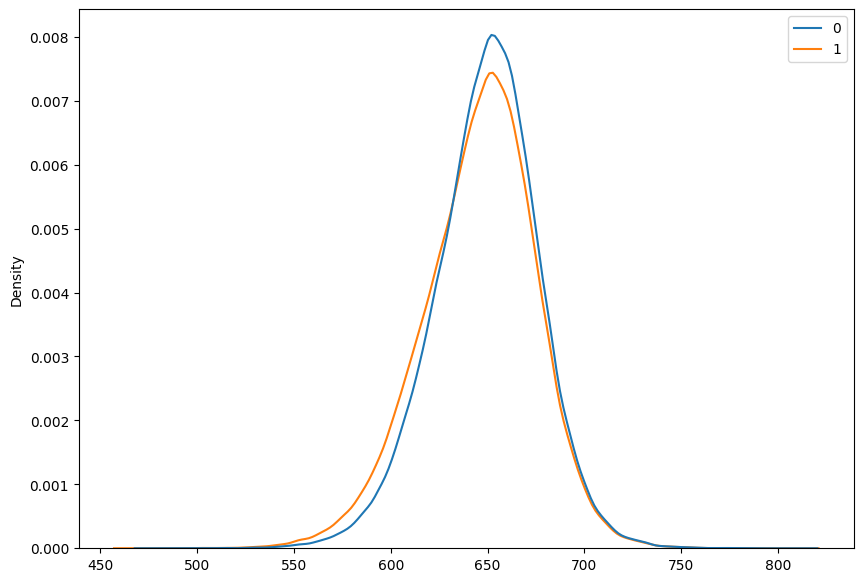

In [8]:
for idx, i in enumerate(index_0):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i], X[i + 1]])

    print(idx, y[i])

    value, is_drift = ks(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = js(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = kl_div(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = psi(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = wd(X[i], X[i + 1])
    print(value, is_drift, "\n")

0 1
0.0 True
0.18136362236982256 True
0.13100675766915593 True
0.2682344837486398 True
0.501899011228548 True 

1 1
0.0 True
0.1792035067771191 True
0.12967729129439687 True
0.26189675434583276 True
0.4902121190556996 True 

2 1
0.0 True
0.10250766737893206 True
0.04248153705657527 False
0.0845190078603823 False
0.25153876499960764 True 

3 1
0.0 True
0.1465287922251161 True
0.0844675011215107 False
0.1743962646582303 True
0.42030645373331055 True 

4 1
0.0 True
0.16812305771364208 True
0.11630933672369226 True
0.22948859400364782 True
0.45004003138762555 True 

5 1
0.0 True
0.14474156614259967 True
0.08441003508021475 False
0.16943581358261092 True
0.3960034888714328 True 

6 1
0.0 True
0.11327664644078901 True
0.05295273309837401 False
0.10352588716034865 True
0.1937334645809112 True 

7 1
0.0 True
0.1608258442883916 True
0.10801906770040946 True
0.2101990883761564 True
0.36377448290706443 True 

8 1
0.0 True
0.10277292299828059 True
0.04501763768351943 False
0.08547212296637441 Fals

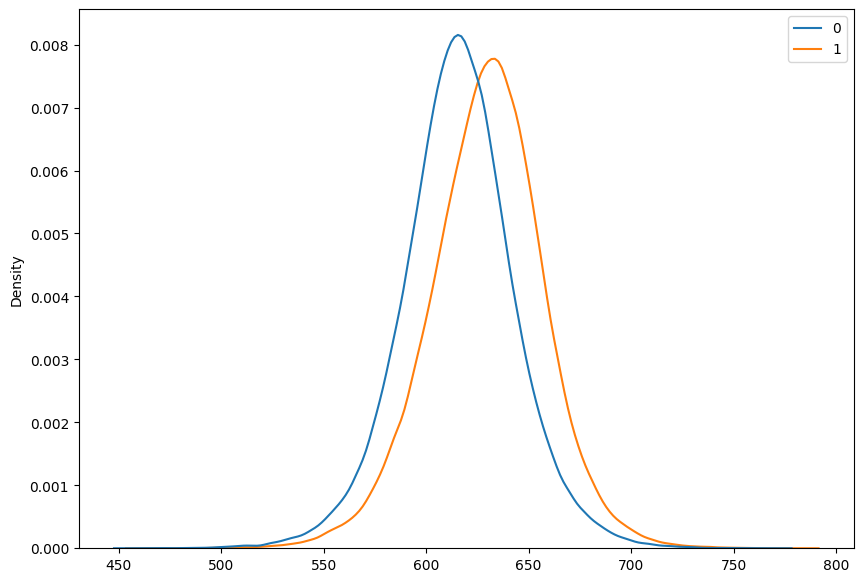

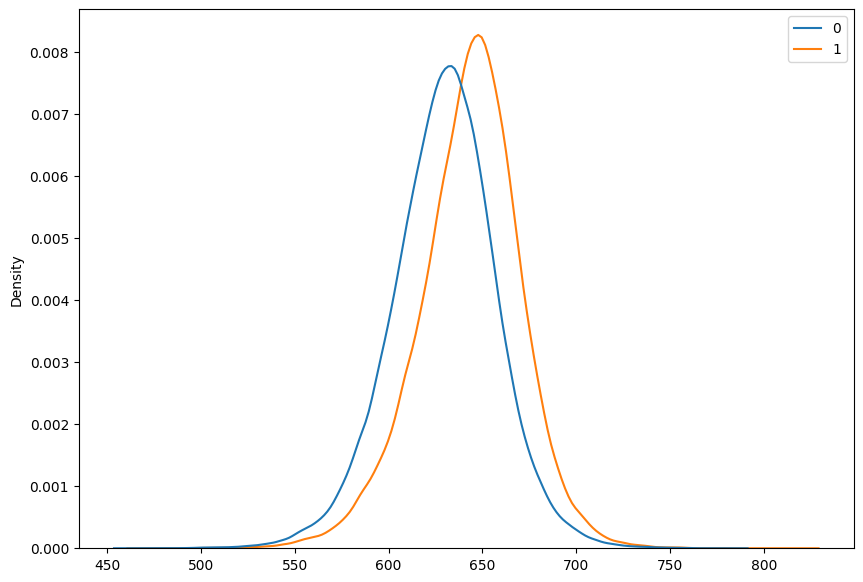

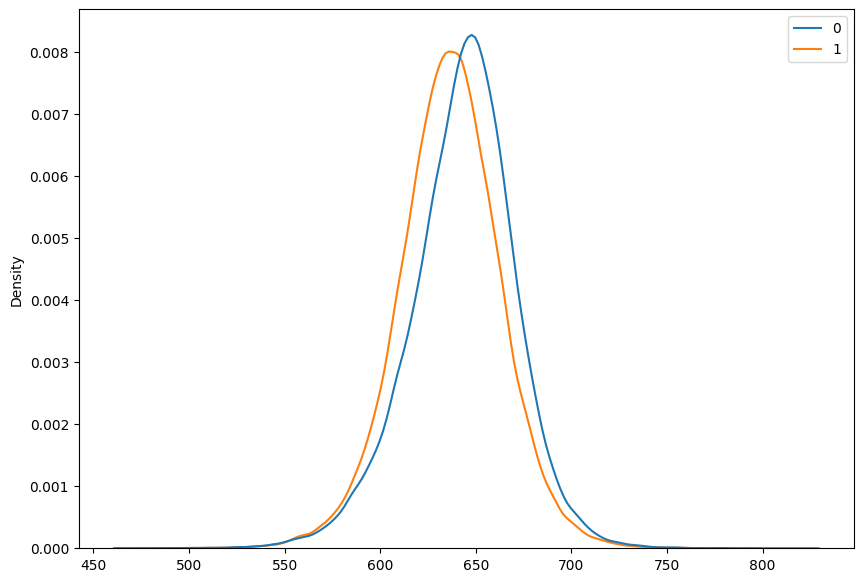

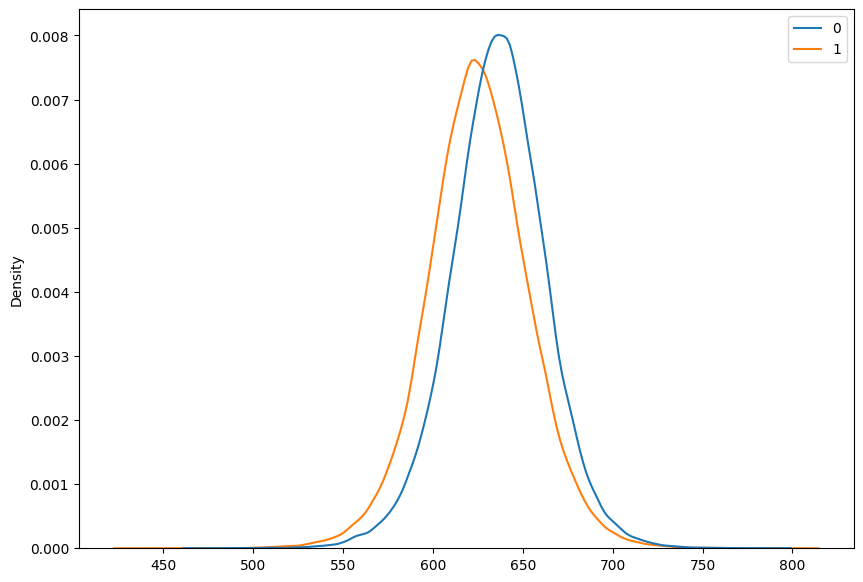

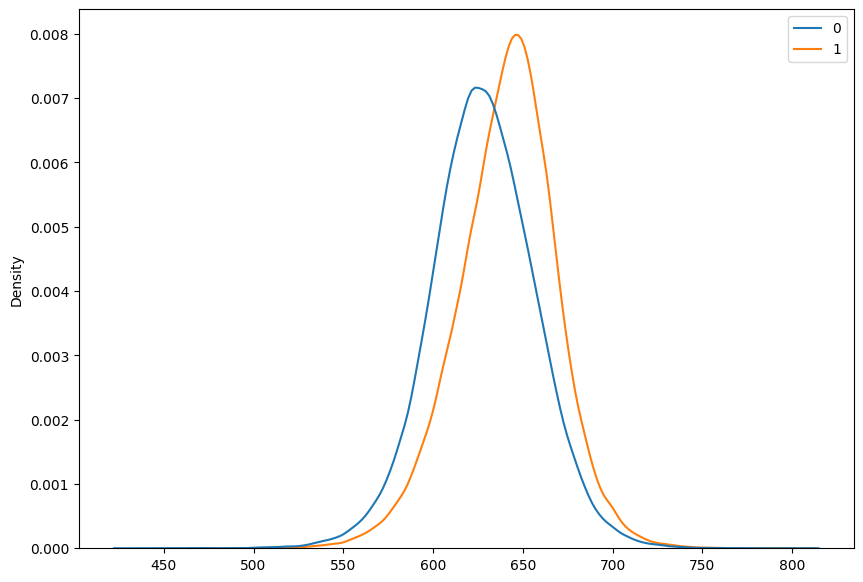

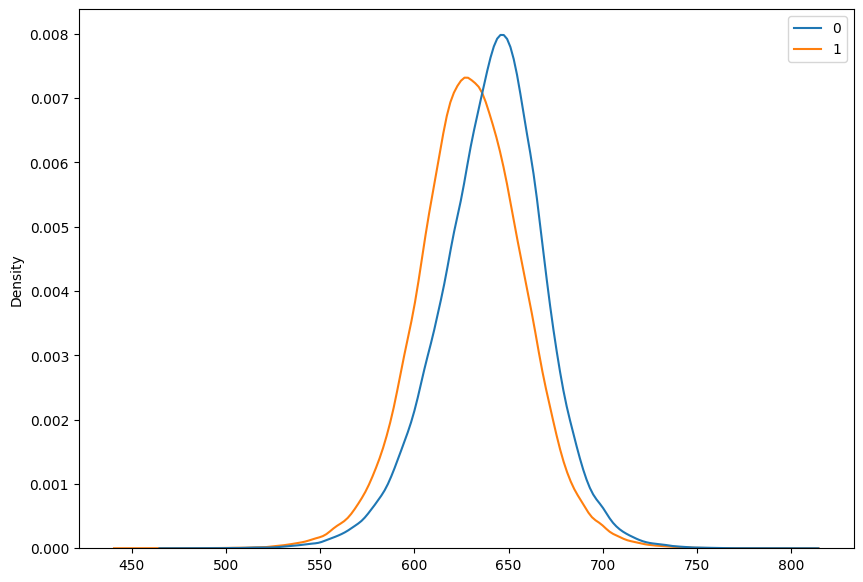

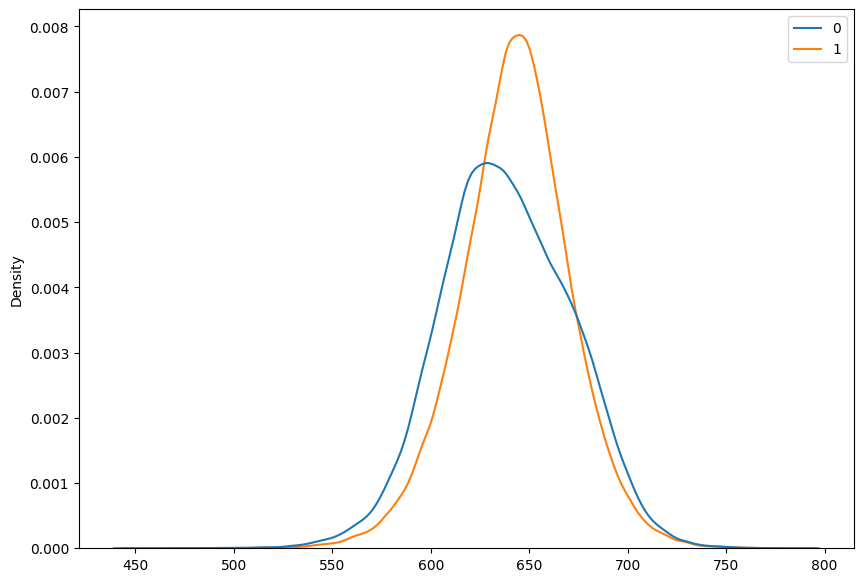

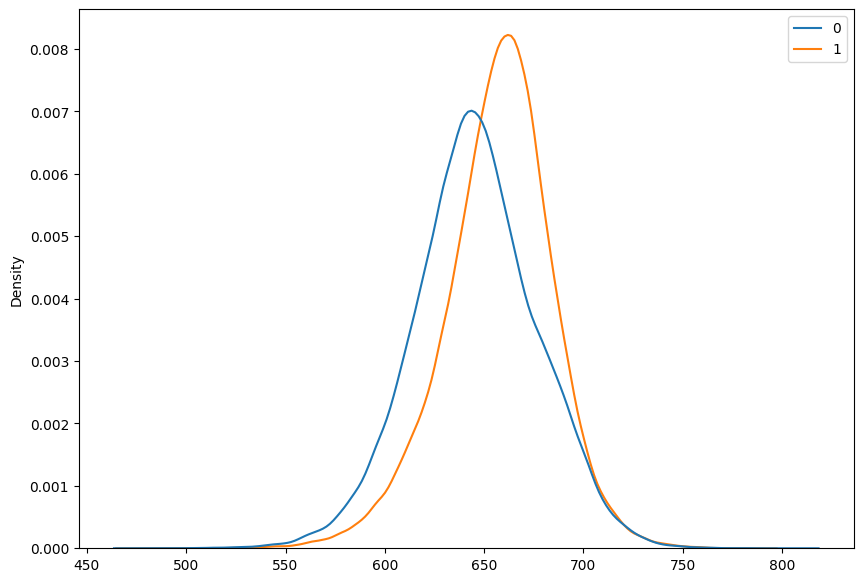

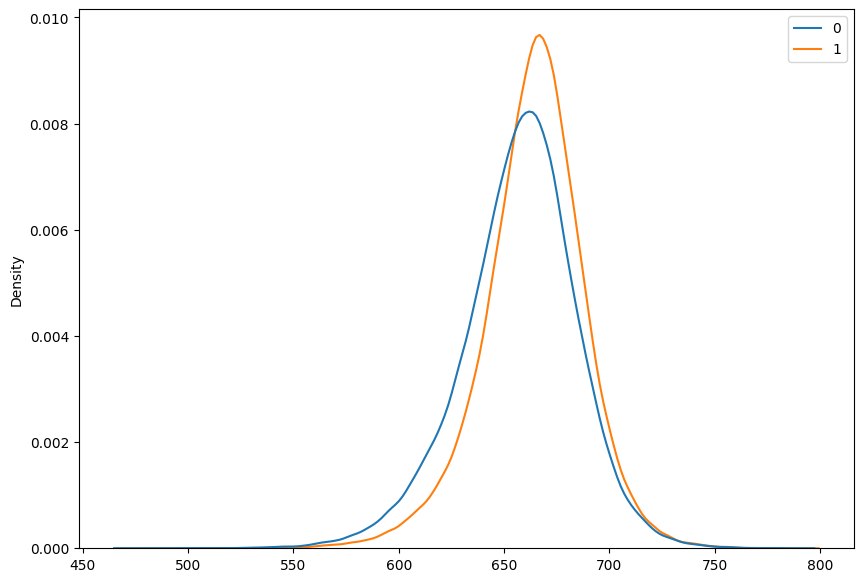

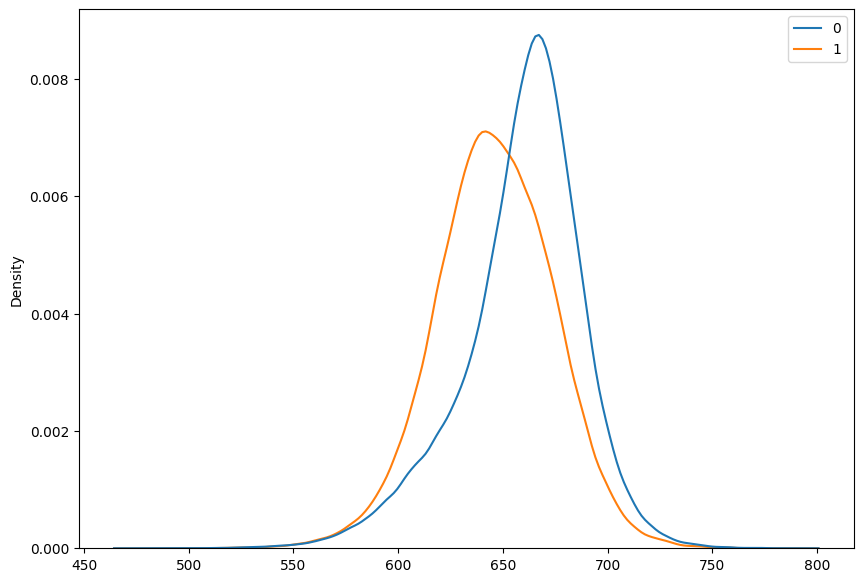

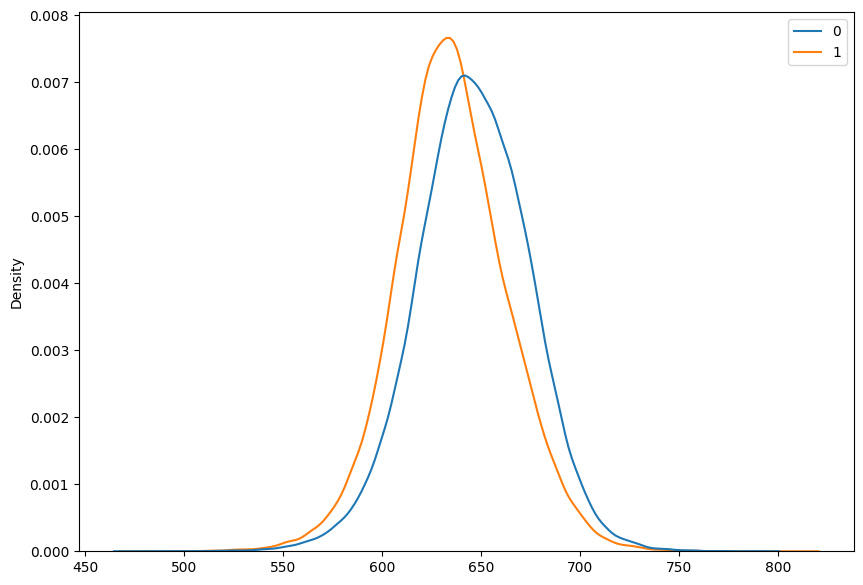

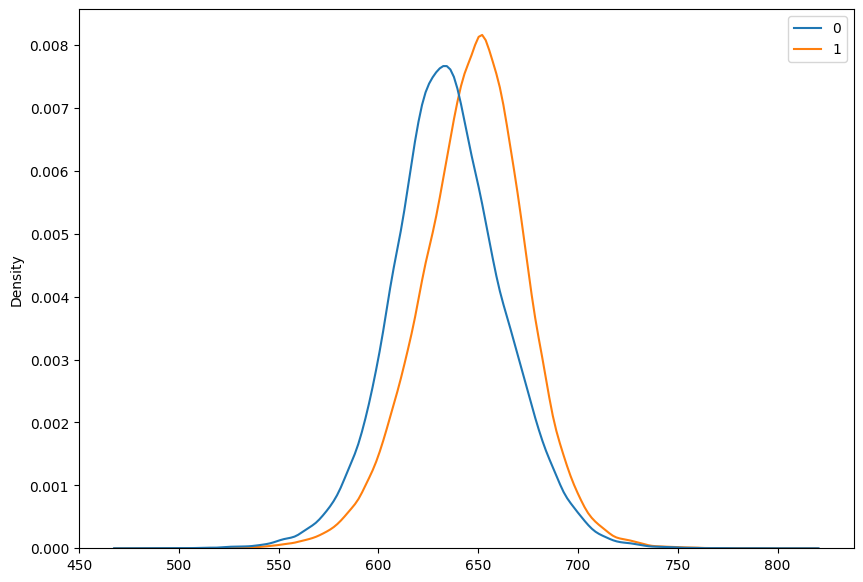

In [9]:
for idx, i in enumerate(index_1):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i], X[i + 1]])

    print(idx, y[i])

    value, is_drift = ks(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = js(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = kl_div(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = psi(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = wd(X[i], X[i + 1])
    print(value, is_drift, "\n")

# Modeling

In [5]:
data_path = "../data/train/hist/logistic_30_days_10000_samples.npy"
data = np.load(data_path)
data.shape

(30, 552)

In [ ]:
train_data

In [7]:
X, y = data[:, :-1], data[:, -1]

0
0.0872292114170121 False
0.030448089121332417 False
0.06111751463581387 False
0.2239636209121661 True


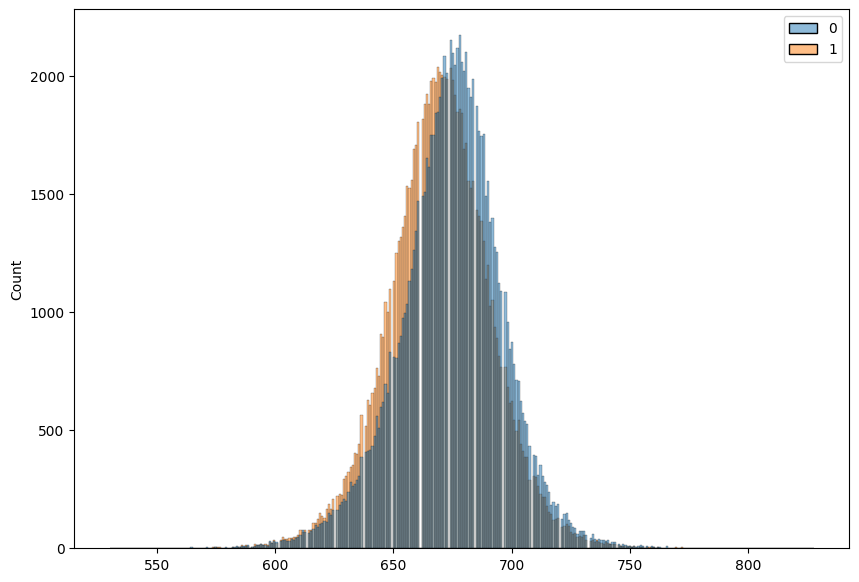

In [6]:
i =58

print(y[i + 1])

plt.figure(figsize=(10, 7))
sns.histplot([X[i], X[i + 1]])

value, is_drift = js(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = kl_div(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = psi(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = wd(X[i], X[i + 1])
print(value, is_drift)

In [3]:
with open("../data/train/logistic_30_days_100000_samples.np", "wb") as f:
    np.save(f, data)